# Importing Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import statistics
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings

# import module Scikit-Learn provides functions for splitting data into training and test sets
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
# Importing the dataset
dataset = pd.read_csv('student_performance_dataset.csv')

In [3]:
# Loking at the dataset
dataset.head(100)

,Hours_Studied,Hours_Sleep,Caffeine_Intake,Stress,Exam_Score
0,22.5,4.9,4,No,94.1
1,19.3,6.4,5,No,96.2
2,23.2,6.5,5,No,85.8
3,27.6,5.8,1,Yes,99.8
4,18.8,6.8,0,Yes,83.5
...,...,...,...,...,...
95,12.7,7.6,3,No,78.6
96,21.5,5.7,4,No,88.2
97,21.3,7.2,3,Yes,83.5
98,20.0,7.1,0,No,92.0


In [4]:
dataset.describe(include='all') # summary overview of dataset

,Hours_Studied,Hours_Sleep,Caffeine_Intake,Stress,Exam_Score
count,100.000000,100.000000,100.000000,100,100.000000
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,No,NaN
freq,NaN,NaN,NaN,68,NaN
mean,19.484000,7.009000,1.940000,NaN,88.735000
std,4.540541,1.378998,1.625678,NaN,7.518037
min,6.900000,4.100000,0.000000,NaN,61.300000
25%,17.000000,5.800000,1.000000,NaN,83.850000
50%,19.350000,7.100000,2.000000,NaN,88.600000
75%,22.050000,7.825000,3.000000,NaN,93.950000


In [5]:
# Looking at unique values
dataset.nunique()

Hours_Studied      79
Hours_Sleep        45
Caffeine_Intake     7
Stress              2
Exam_Score         72
dtype: int64

In [6]:
df = pd.DataFrame(dataset)# create a pd dataframe

rows = df.shape[0]  #number of rows
columns =  df.shape[1]  #number of comlumns
print("Dataset:",df.shape, "\nNumber of rows:", rows, "\nNumber of Columns:", columns)

Dataset: (100, 5) 
Number of rows: 100 
Number of Columns: 5


In [7]:
missing_values = df.isnull().values.any() #contains missing value
print("\n Contain Missing values: ?", missing_values)
print("\n Columns with missed values: \n", df.isna().any())


 Contain Missing values: ? False

 Columns with missed values: 
 Hours_Studied      False
Hours_Sleep        False
Caffeine_Intake    False
Stress             False
Exam_Score         False
dtype: bool


In [8]:
df.info()#identify the type of data to handle with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hours_Studied    100 non-null    float64
 1   Hours_Sleep      100 non-null    float64
 2   Caffeine_Intake  100 non-null    int64  
 3   Stress           100 non-null    object 
 4   Exam_Score       100 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.0+ KB


# Descriptive statistics

In [9]:
#mappin 'No' to 0 and 'Yes' to 1
df = pd.DataFrame(dataset)
df['Stress_Encoded'] = df['Stress'].map({'No': 0, 'Yes': 1})

# calculate for all numerical columns
mean = df.mean(numeric_only=True)
median = df.median(numeric_only=True)
mode = df.mode(numeric_only=True).iloc[0]

print("\n Mean (Average):\n", mean)
print("\n Median (Middle Value):\n", median)
print("\n Mode (Most Frequent):\n", mode)

std_value = df.std(numeric_only=True)
print("\n Standard Deviation:\n", std_value)


 Mean (Average):
 Hours_Studied      19.484
Hours_Sleep         7.009
Caffeine_Intake     1.940
Exam_Score         88.735
Stress_Encoded      0.320
dtype: float64

 Median (Middle Value):
 Hours_Studied      19.35
Hours_Sleep         7.10
Caffeine_Intake     2.00
Exam_Score         88.60
Stress_Encoded      0.00
dtype: float64

 Mode (Most Frequent):
 Hours_Studied       17.7
Hours_Sleep          7.3
Caffeine_Intake      1.0
Exam_Score         100.0
Stress_Encoded       0.0
Name: 0, dtype: float64

 Standard Deviation:
 Hours_Studied      4.540541
Hours_Sleep        1.378998
Caffeine_Intake    1.625678
Exam_Score         7.518037
Stress_Encoded     0.468826
dtype: float64


# statistical graphics to better visualize

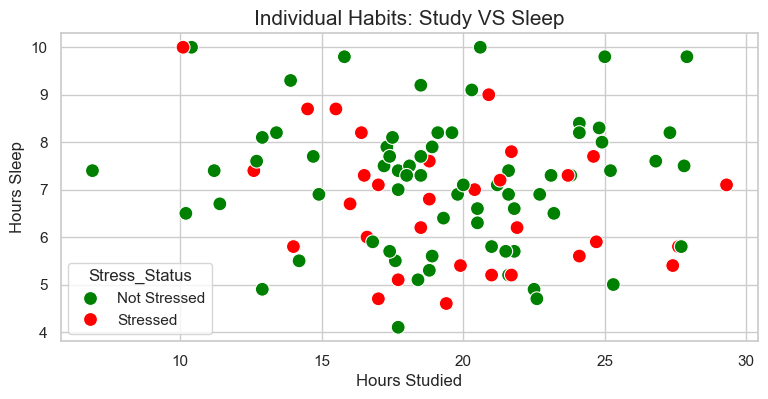

In [33]:
df['Stress_Status'] = df['Stress'].map({'No': 'Not Stressed', 'Yes': 'Stressed'})
sns.set_theme(style="whitegrid")

#Correlation between hours study vs sleep
plt.figure(figsize=(9, 4))
sns.scatterplot(
                data=df, x='Hours_Studied', y='Hours_Sleep', hue='Stress_Status', 
                palette={'Stressed': 'red', 'Not Stressed': 'green'}, s=100
                )
plt.title('Individual Habits: Study VS Sleep', fontsize=15)
plt.xlabel('Hours Studied')
plt.ylabel('Hours Sleep')
plt.show()



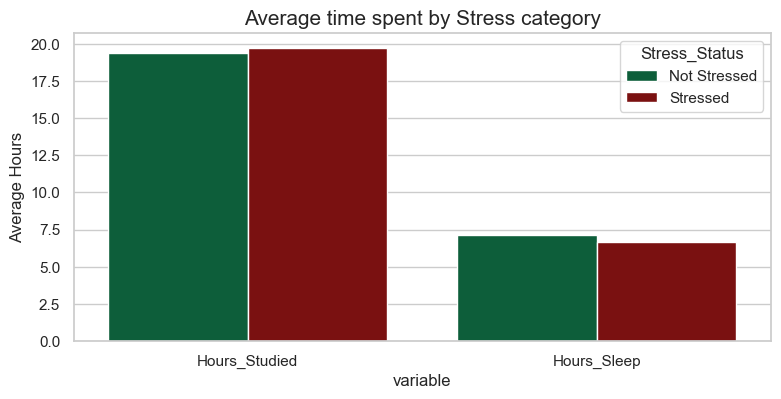

In [51]:
plt.figure(figsize=(9, 4))
average_df = df.melt(id_vars='Stress_Status', value_vars=['Hours_Studied', 'Hours_Sleep'])#comparison of averages
sns.barplot(data=average_df, x='variable', y='value', hue='Stress_Status', palette=['#006b3c', '#8B0000'], errorbar=None)
plt.title('Average time spent by Stress category', fontsize=15)
plt.ylabel('Average Hours')
plt.show()

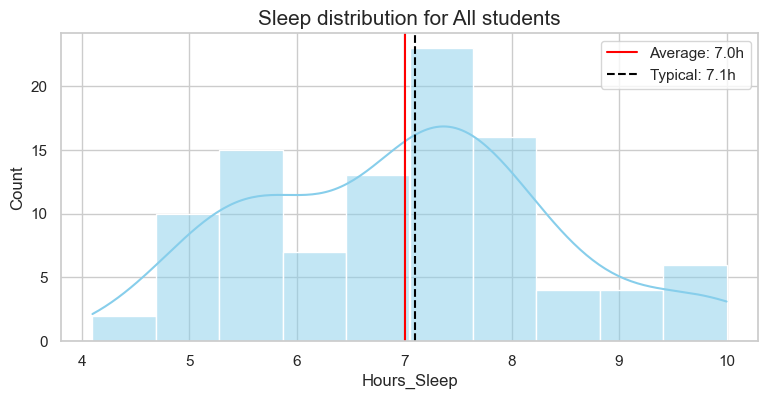

In [56]:
plt.figure(figsize=(9, 4))
sns.histplot(data=df, x='Hours_Sleep', kde=True, color='skyblue', bins=10)
plt.axvline(df['Hours_Sleep'].mean(), color='red', 
            linestyle='-', label=f'Average: 
            {df["Hours_Sleep"].mean():.1f}h')
plt.axvline(df['Hours_Sleep'].median(), color='black', 
            linestyle='--', label=f'Typical: 
            {df["Hours_Sleep"].median():.1f}h')
plt.title('Sleep distribution for All students', fontsize=15)
plt.legend()
plt.show()

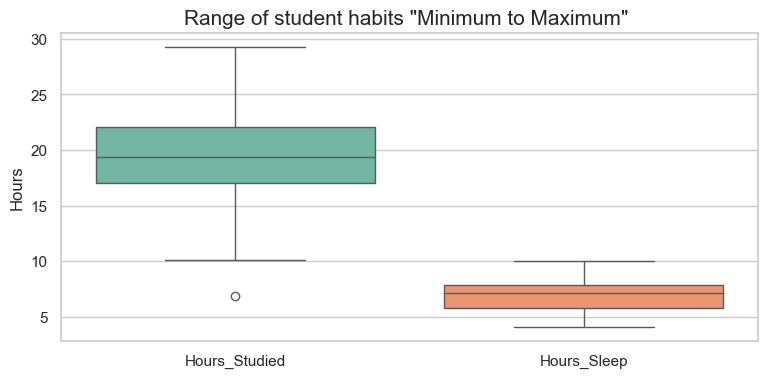

In [62]:
plt.figure(figsize=(9, 4))
sns.boxplot(data=df[['Hours_Studied', 'Hours_Sleep']], palette='Set2')
plt.title('Range of student habits "Minimum to Maximum" ', fontsize=15)
plt.ylabel('Hours')
plt.show()

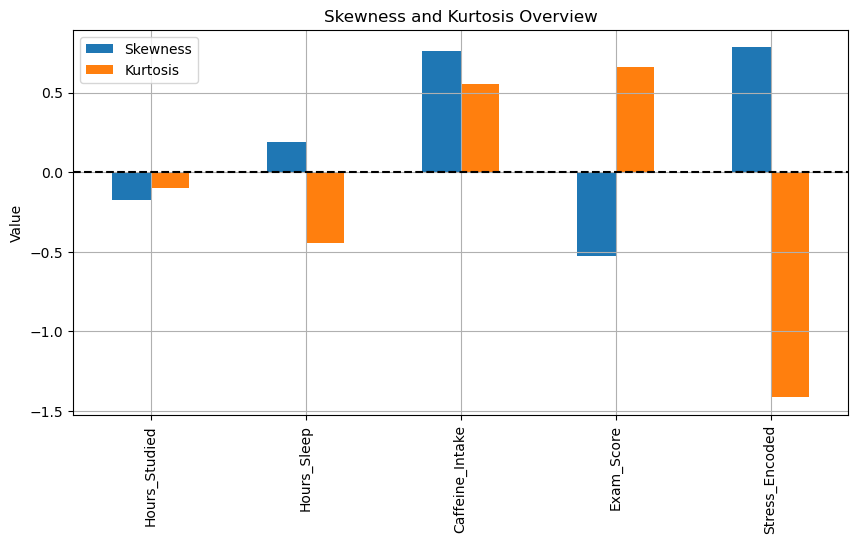

In [10]:
summary = df.skew(numeric_only=True).to_frame(name='Skewness')#asymmetry of data for each column
summary['Kurtosis'] = df.kurtosis(numeric_only=True)#mesure prencense of outliers
#plot
summary.plot(kind='bar', figsize=(10, 5), title='Skewness and Kurtosis Overview')
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('Value')
plt.grid(True)

In [11]:
#display sum of miss value per column
print("\n","Missing Values per column", df.isnull().sum())

#Total 
print("\n","Total:", df.isnull().sum().sum())

#display total percentage
print("\n", np.round(df.isnull().sum().mean(), 4), " % Total percentage of missing values")



 Missing Values per column Hours_Studied      0
Hours_Sleep        0
Caffeine_Intake    0
Stress             0
Exam_Score         0
Stress_Encoded     0
dtype: int64

 Total: 0

 0.0  % Total percentage of missing values
